<a href="https://colab.research.google.com/github/shama-anjum-11/HemOptima/blob/main/hemoptima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Generate synthetic vitals data
def generate_vitals_data(n=200):
    data = []
    for _ in range(n):
        heart_rate = random.choices(
            population=[random.randint(45, 59), random.randint(60, 100), random.randint(101, 140)],
            weights=[0.2, 0.55, 0.25],
            k=1
        )[0]

        systolic_bp = random.randint(75, 130)
        diastolic_bp = random.randint(50, 90)
        spo2 = random.randint(85, 100)
        temperature = round(random.uniform(36.0, 39.5), 1)

        # Define bleeding condition
        bleeding_detected = int(
            (heart_rate > 100 or heart_rate < 55) and
            (systolic_bp < 90 or spo2 < 93)
        )

        data.append({
            "heart_rate": heart_rate,
            "systolic_bp": systolic_bp,
            "diastolic_bp": diastolic_bp,
            "spo2": spo2,
            "temperature": temperature,
            "bleeding_detected": bleeding_detected
        })

    return pd.DataFrame(data)

print("Generating synthetic vitals data...")
vitals_data = generate_vitals_data()
print(vitals_data)

Generating synthetic vitals data...
     heart_rate  systolic_bp  diastolic_bp  spo2  temperature  \
0            97           75            59    93         39.4   
1           122          120            59    93         38.4   
2           131          104            50    85         36.7   
3            47           82            67    99         38.3   
4            87           87            62    92         36.9   
..          ...          ...           ...   ...          ...   
195         108           96            58    96         36.7   
196          74           95            61    95         36.7   
197          98          130            77    93         37.6   
198          85           99            74    96         36.9   
199         130           88            70    87         39.3   

     bleeding_detected  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
..                 ...  
195     

In [ ]:
df = generate_vitals_data()
print(df.head())

   heart_rate  systolic_bp  diastolic_bp  spo2  temperature  bleeding_detected
0          62          116            70    88         37.0                  0
1         115           99            86    87         37.0                  1
2         122          111            50    90         38.9                  1
3          94          124            69    93         39.4                  0
4          66          109            55    90         37.2                  0


In [ ]:
# Step 3: Prepare data for training
X = df.drop("bleeding_detected", axis=1)
y = df["bleeding_detected"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



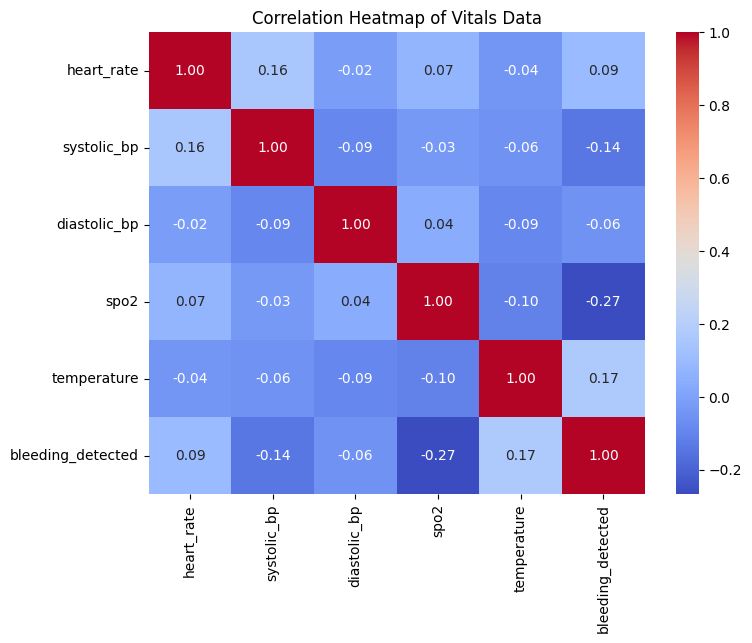

In [ ]:
# prompt: heat map for the above

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Vitals Data')
plt.show()